# Trabajo Final - David Zapata

## 05- comparación

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

 Clasificación - Random Forest
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409


 Clasificación - Árbol de Decisión
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1036
           1       0.66      0.39      0.49       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



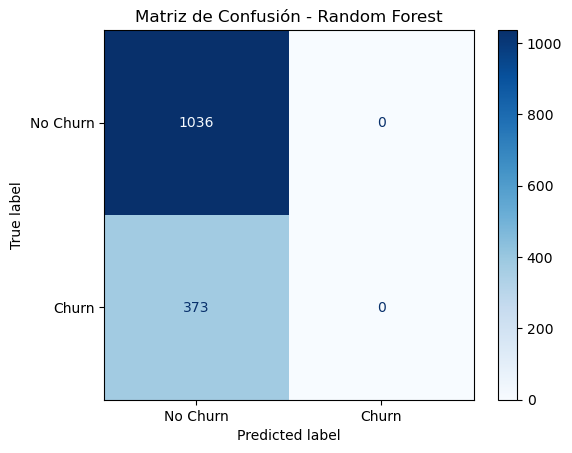

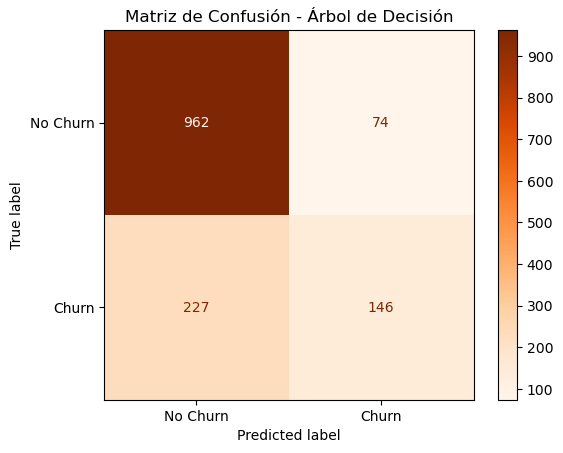

 Concordancia entre Random Forest y Decision Tree: 84.39%


In [26]:
df = pd.read_csv("dataset_preprocesado.csv")
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(" Clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\n Clasificación - Árbol de Decisión")
print(classification_report(y_test, y_pred_dt))

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Churn", "Churn"])
disp_rf.plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Churn", "Churn"])
disp_dt.plot(cmap='Oranges')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

df_preds = pd.DataFrame({
    "Real": y_test,
    "RF": y_pred_rf,
    "DT": y_pred_dt
})

acuerdo = (df_preds['RF'] == df_preds['DT']).sum()
total = len(df_preds)
porcentaje_concordancia = acuerdo / total

print(f" Concordancia entre Random Forest y Decision Tree: {porcentaje_concordancia:.2%}")